In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler,  MinMaxScaler

In [2]:
df=pd.read_csv("/content/wine.csv")
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
df = df.drop('Type', axis=1)
df.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In the above code we are discarding the type column to have a clarification on our  further analysis as it includes 3 cluster sets

In [4]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Alcohol          178 non-null    float64
 1   Malic            178 non-null    float64
 2   Ash              178 non-null    float64
 3   Alcalinity       178 non-null    float64
 4   Magnesium        178 non-null    int64  
 5   Phenols          178 non-null    float64
 6   Flavanoids       178 non-null    float64
 7   Nonflavanoids    178 non-null    float64
 8   Proanthocyanins  178 non-null    float64
 9   Color            178 non-null    float64
 10  Hue              178 non-null    float64
 11  Dilution         178 non-null    float64
 12  Proline          178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [5]:
df.describe()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [7]:
df.isna().sum()

Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [6]:
df.duplicated().sum()

0

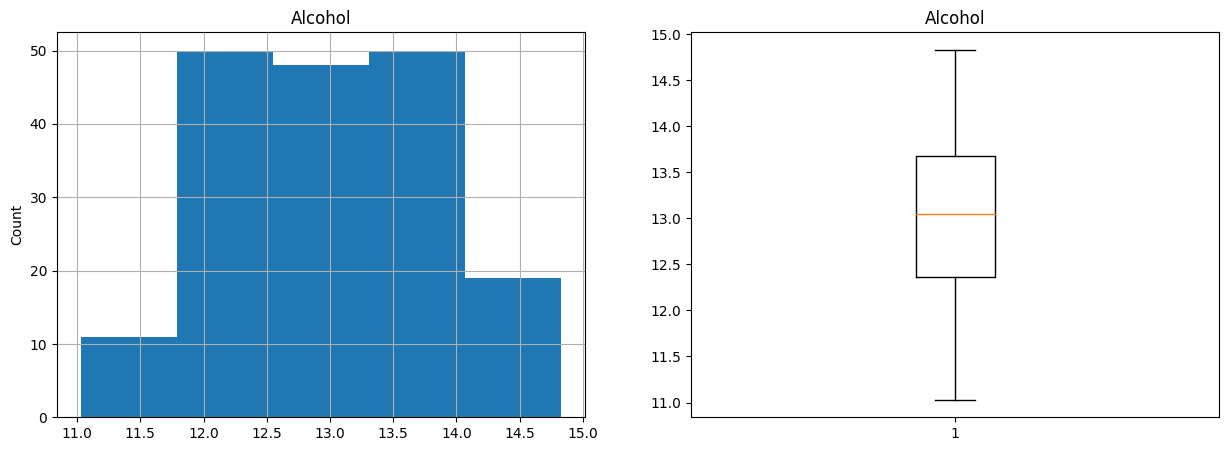

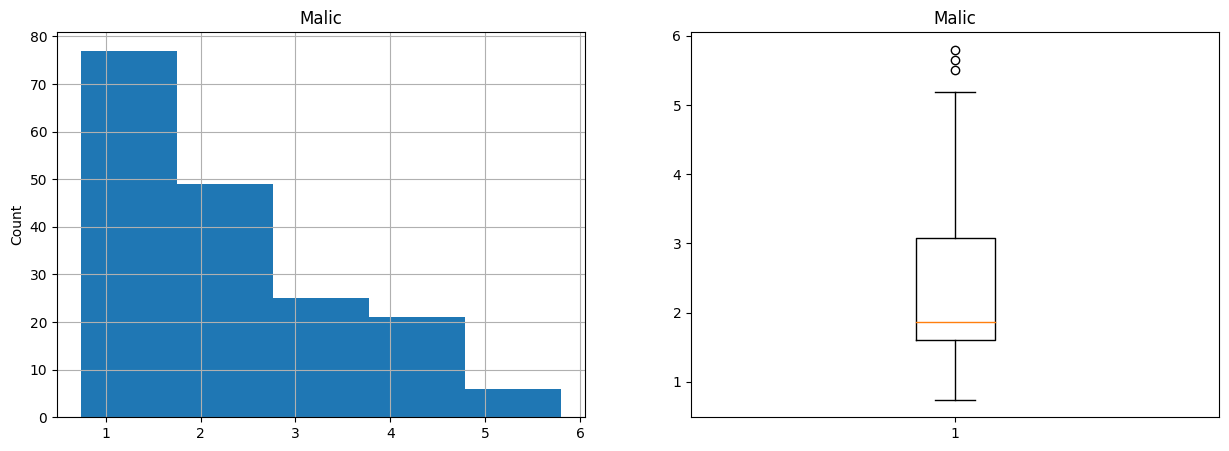

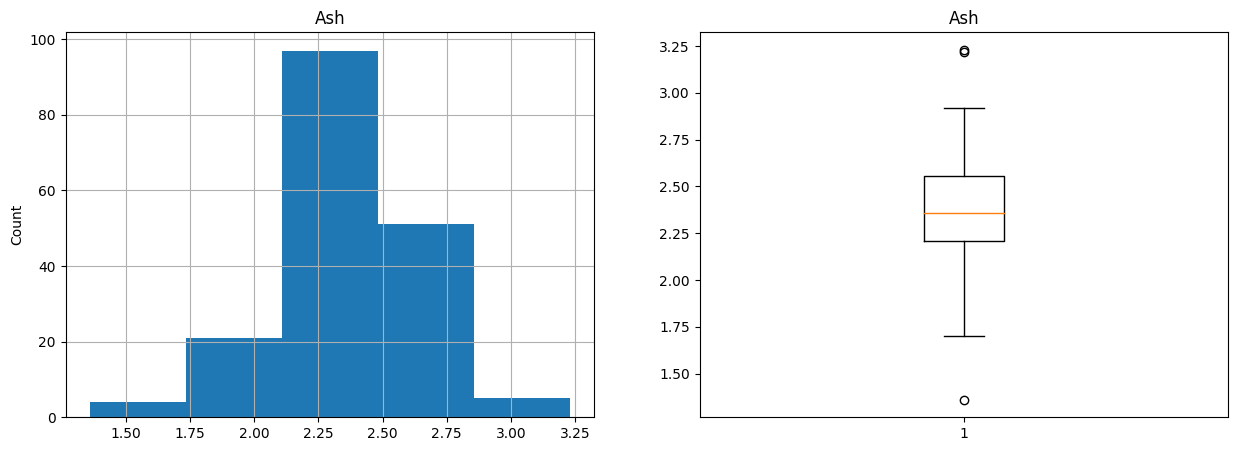

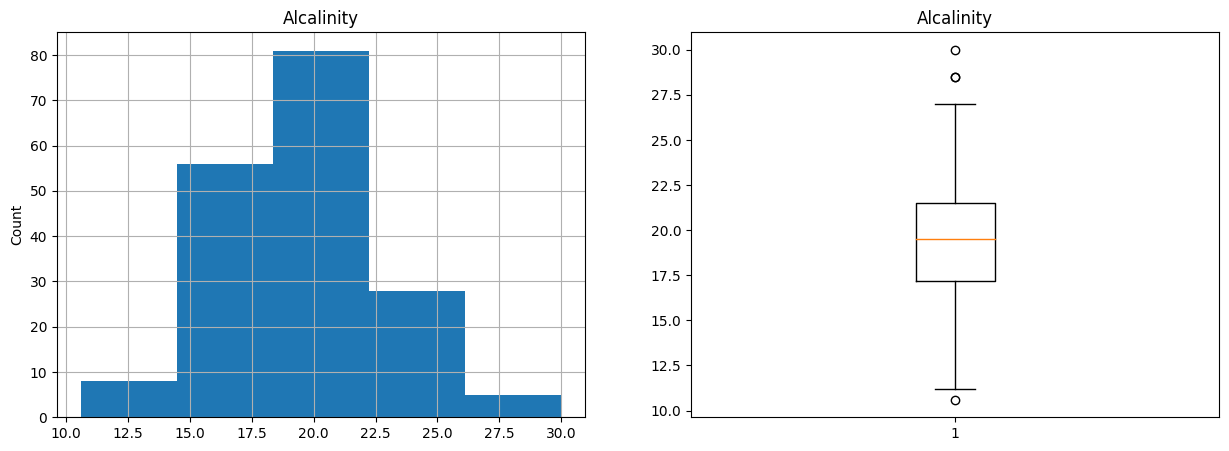

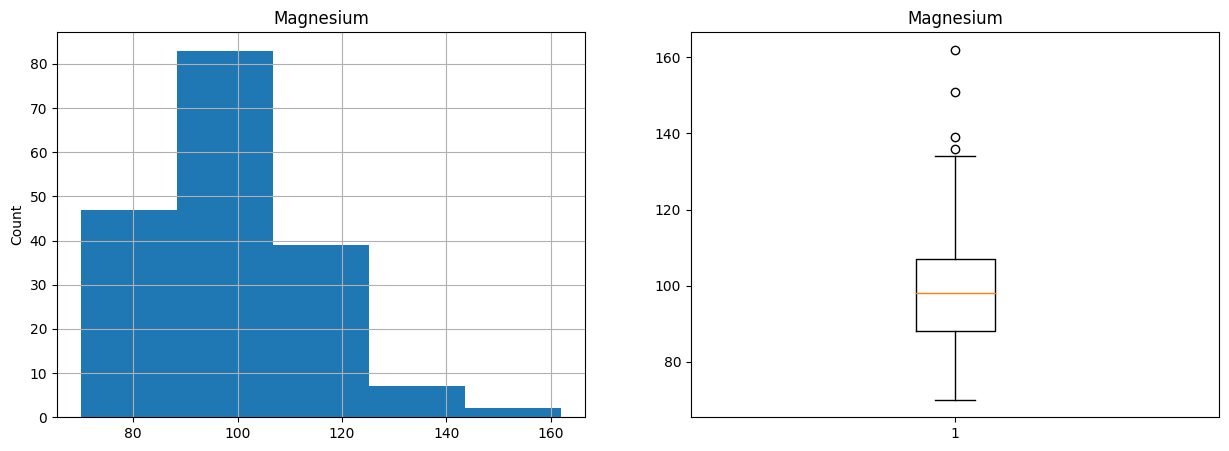

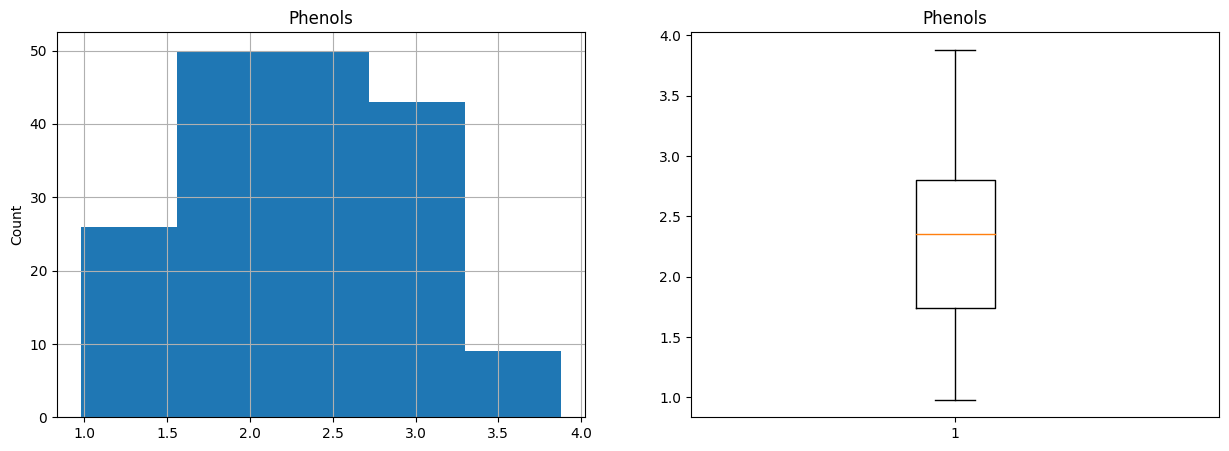

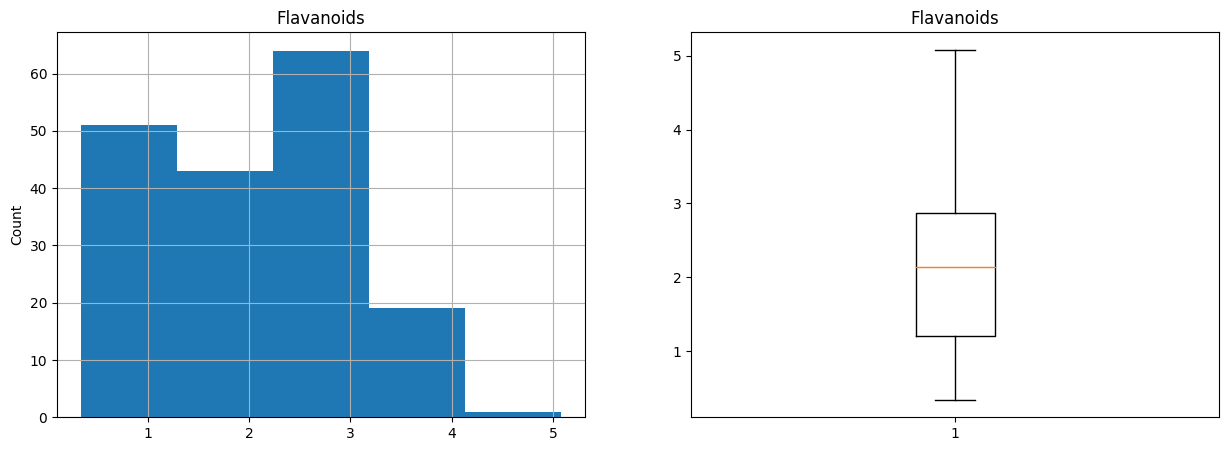

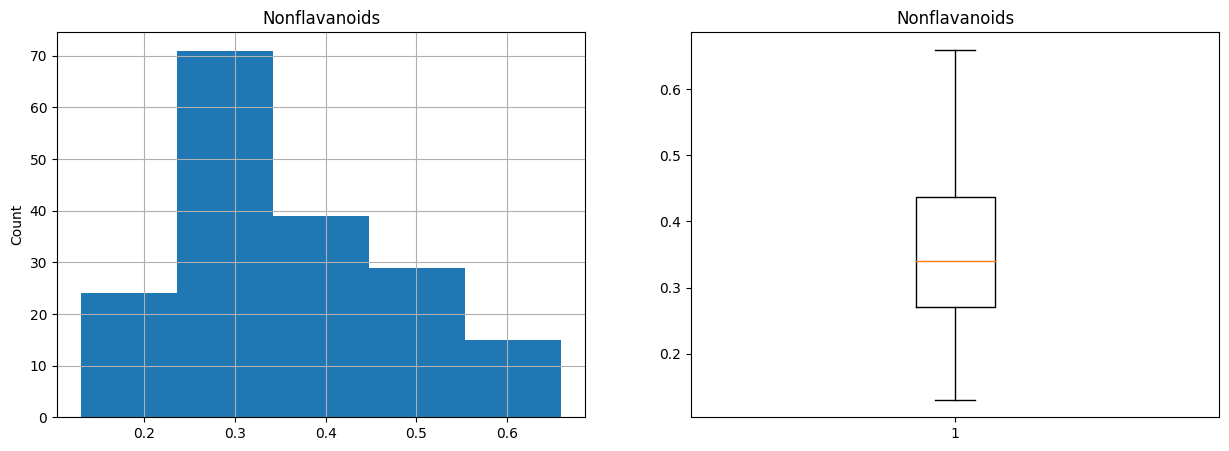

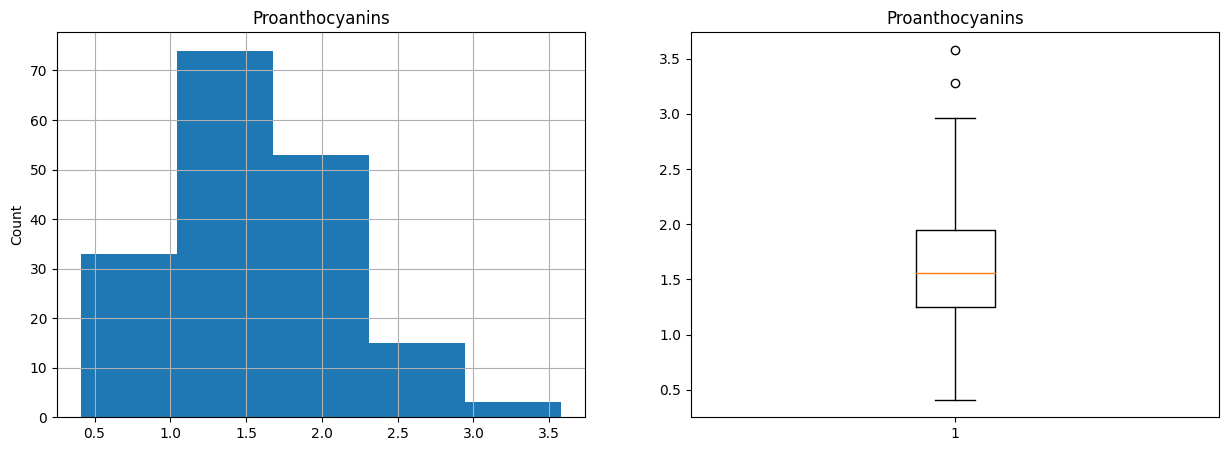

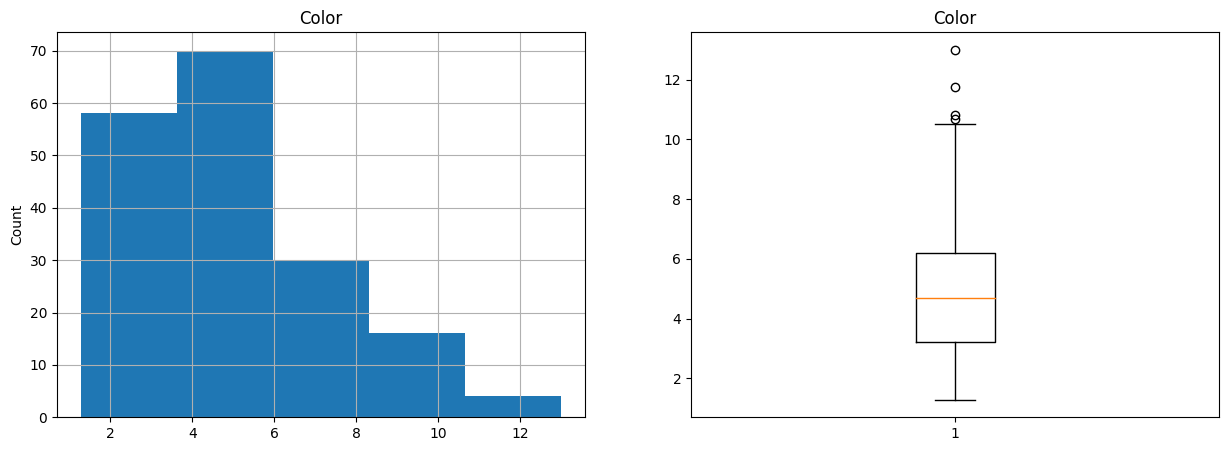

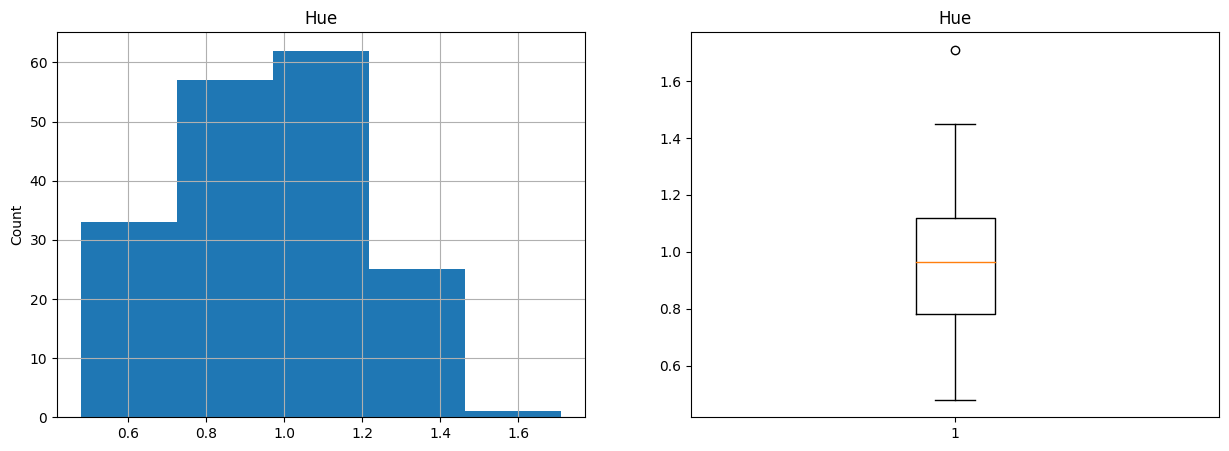

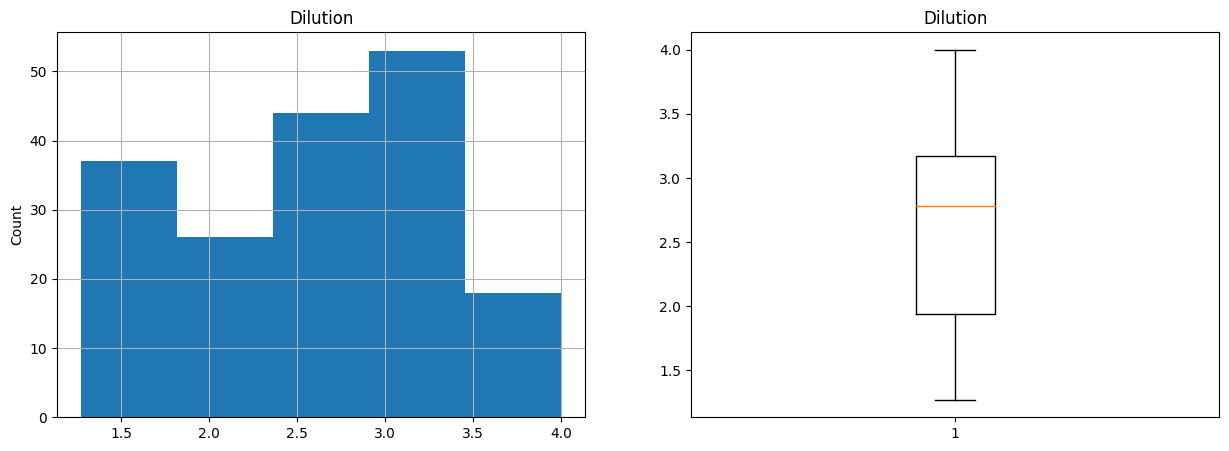

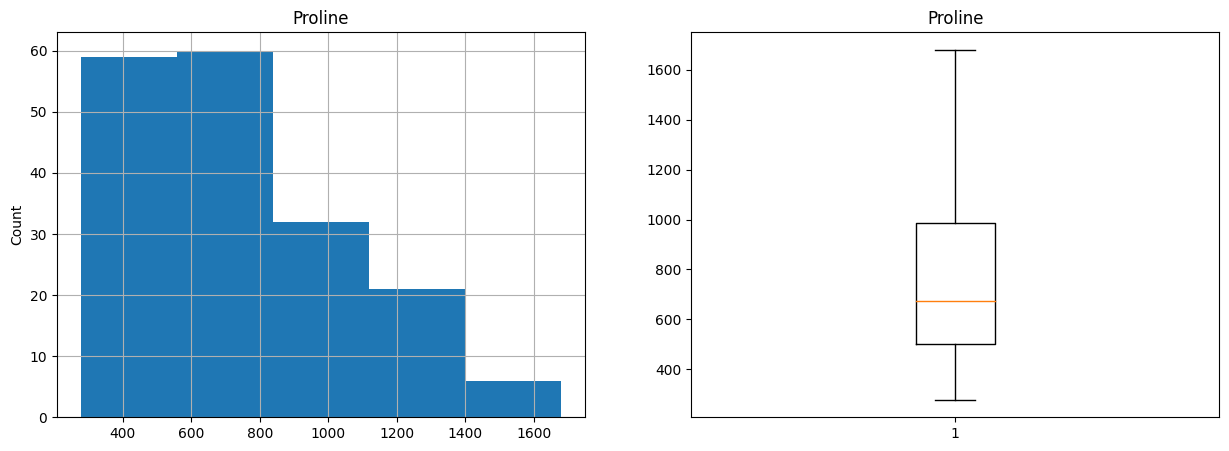

In [9]:
#visualization
for feature in df.columns:

    plt.figure(figsize=(15,5))

    plt.subplot(1,2,1)
    df[feature].hist(bins=5)
    plt.ylabel('Count')
    plt.title(feature)

    plt.subplot(1,2,2)
    plt.boxplot(df[feature])
    plt.title(feature)

    plt.show()

In [10]:
#Normalising data
minmax = MinMaxScaler()
df_norm = minmax.fit_transform(df) 
df_norm
     

array([[0.84210526, 0.1916996 , 0.57219251, ..., 0.45528455, 0.97069597,
        0.56134094],
       [0.57105263, 0.2055336 , 0.4171123 , ..., 0.46341463, 0.78021978,
        0.55064194],
       [0.56052632, 0.3201581 , 0.70053476, ..., 0.44715447, 0.6959707 ,
        0.64693295],
       ...,
       [0.58947368, 0.69960474, 0.48128342, ..., 0.08943089, 0.10622711,
        0.39728959],
       [0.56315789, 0.36561265, 0.54010695, ..., 0.09756098, 0.12820513,
        0.40085592],
       [0.81578947, 0.66403162, 0.73796791, ..., 0.10569106, 0.12087912,
        0.20114123]])

In [11]:
#standardising data
scaler = StandardScaler()
df_std = scaler.fit_transform(df)
df_std

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [12]:
pca = PCA()
pca_values = pca.fit_transform(df_norm)
pca_values

array([[-0.70633576, -0.25319275,  0.02409269, ...,  0.04971144,
        -0.02001158, -0.00872296],
       [-0.4849768 , -0.00882289, -0.28048205, ...,  0.07415784,
        -0.05083753, -0.00524944],
       [-0.52117227, -0.18918722,  0.19621674, ...,  0.0121311 ,
        -0.10418449, -0.02316441],
       ...,
       [ 0.62631289, -0.54685701, -0.03049476, ...,  0.13116697,
         0.11160576,  0.0389133 ],
       [ 0.5729911 , -0.42551609, -0.09453672, ...,  0.03027458,
         0.05732893,  0.01103053],
       [ 0.701764  , -0.51350498,  0.29390996, ..., -0.02784028,
         0.01873501, -0.06648261]])

In [13]:
var = pca.explained_variance_ratio_ 
var 

array([0.40749485, 0.18970352, 0.08561671, 0.07426678, 0.05565301,
       0.04658837, 0.03663929, 0.02408789, 0.02274371, 0.02250965,
       0.01381292, 0.01273236, 0.00815095])

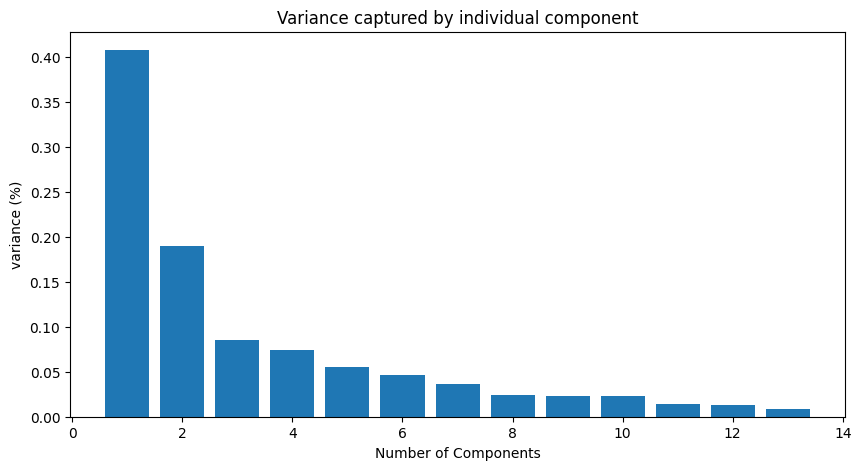

In [14]:
plt.figure(figsize=(10,5))
plt.bar(range(1,len(var)+1) , var)

plt.xlabel('Number of Components')
plt.ylabel('variance (%)')
plt.title('Variance captured by individual component')
plt.show()

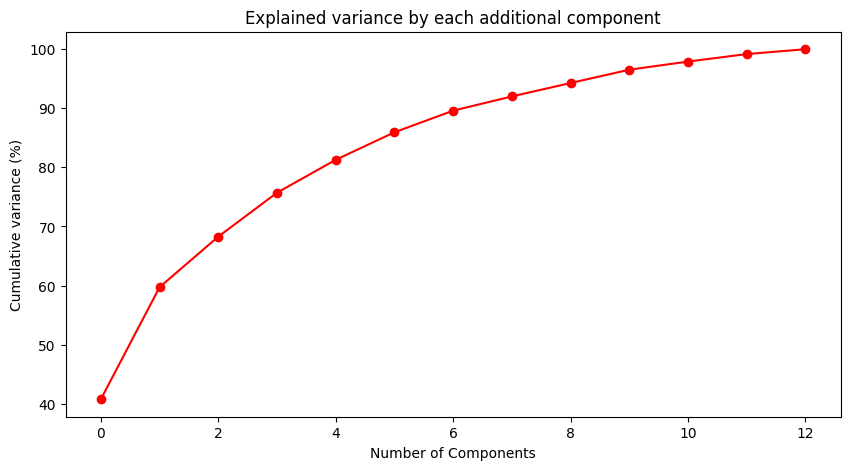

In [15]:
# Cumulative variance 
var1 = np.cumsum(np.round(var, 4)*100)
var1 

# Commulative Variance plot 
plt.figure(figsize=(10,5))
plt.plot(var1,color="red", linestyle='solid', marker='o') 

plt.xlabel('Number of Components')
plt.title('Explained variance by each additional component')
plt.ylabel('Cumulative variance (%)')
plt.show()

In [16]:
pca = PCA(n_components=3)
pca_values = pca.fit_transform(df_norm)
pca_values 

array([[-7.06335756e-01, -2.53192753e-01,  2.40926932e-02],
       [-4.84976802e-01, -8.82289142e-03, -2.80482048e-01],
       [-5.21172266e-01, -1.89187222e-01,  1.96216736e-01],
       [-8.21643663e-01, -5.80905512e-01,  8.11097172e-02],
       [-2.02546382e-01, -5.94665740e-02,  3.00239941e-01],
       [-6.08190152e-01, -4.87519191e-01, -7.54332321e-02],
       [-5.44047399e-01, -3.00196497e-01, -1.05074621e-01],
       [-4.74357495e-01, -2.98197021e-01, -2.82149308e-03],
       [-5.00432012e-01, -3.07602859e-01, -2.30493613e-01],
       [-6.27517969e-01, -2.06328233e-01, -1.14147932e-01],
       [-7.27467157e-01, -3.56512044e-01, -5.04199490e-02],
       [-3.74967744e-01, -2.25424535e-01, -2.86134083e-01],
       [-4.48188283e-01, -2.31938139e-01, -1.67908053e-01],
       [-6.26345329e-01, -3.55138677e-01, -8.58356579e-02],
       [-8.35717011e-01, -5.38047802e-01, -1.15202943e-01],
       [-4.71931568e-01, -3.37405385e-01, -7.27821607e-02],
       [-4.26990905e-01, -4.50842684e-01

In [17]:
var = pca.explained_variance_ratio_ 
var

#Cumulative variance 
var1 = np.cumsum(np.round(var, 4)*100)
var1

# Creating a df with PC0, PC1, PC2 columns for clustering purpose.

df_norm_pca = pd.DataFrame(data=pca_values, columns=['PC0', 'PC1', 'PC2'])
df_norm_pca.head()

,PC0,PC1,PC2
0,-0.706336,-0.253193,0.024093
1,-0.484977,-0.008823,-0.280482
2,-0.521172,-0.189187,0.196217
3,-0.821644,-0.580906,0.081110
4,-0.202546,-0.059467,0.300240


In [19]:
#Hierarchical Clustering

import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.metrics import silhouette_score as sil 

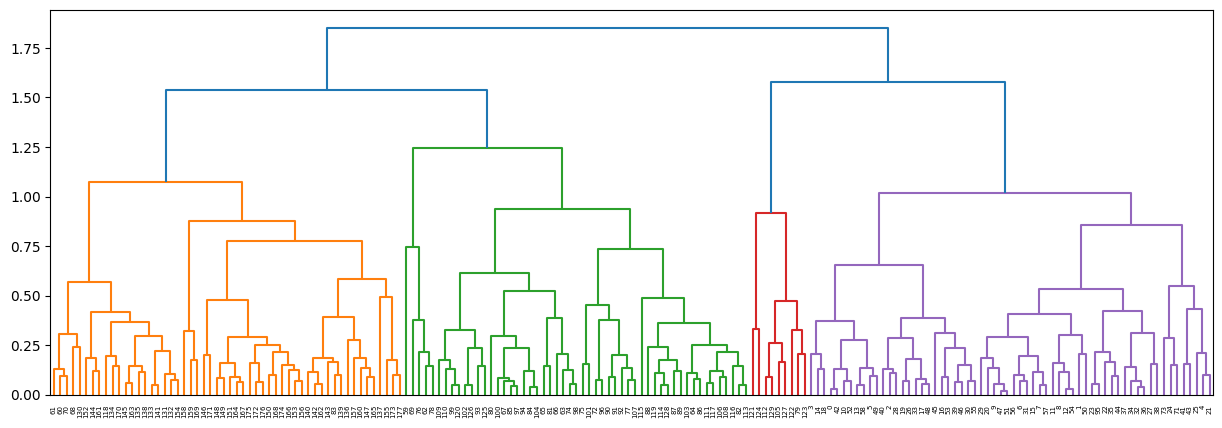

In [21]:
#normalised PCA data
plt.figure(figsize=(15,5))
dendrogram = sch.dendrogram(sch.linkage(df_norm_pca, method= 'complete'))

In [22]:
linkages = ['complete' , 'single' , 'ward' , 'average']

for i in range (2,6):
    for x in linkages:
        hc=AgglomerativeClustering(n_clusters= i, linkage=x)
        y_hc=hc.fit_predict(df_norm_pca)
        sil_score = sil(df_norm_pca, y_hc)
        print('For n=',i,'and linkage =', x, 'Silhouette score is', np.round(sil_score,4))

For n= 2 and linkage = complete Silhouette score is 0.3385
For n= 2 and linkage = single Silhouette score is 0.2657
For n= 2 and linkage = ward Silhouette score is 0.4276
For n= 2 and linkage = average Silhouette score is 0.2657
For n= 3 and linkage = complete Silhouette score is 0.2801
For n= 3 and linkage = single Silhouette score is 0.1421
For n= 3 and linkage = ward Silhouette score is 0.4596
For n= 3 and linkage = average Silhouette score is 0.3905
For n= 4 and linkage = complete Silhouette score is 0.4451
For n= 4 and linkage = single Silhouette score is -0.0004
For n= 4 and linkage = ward Silhouette score is 0.4238
For n= 4 and linkage = average Silhouette score is 0.4472
For n= 5 and linkage = complete Silhouette score is 0.4163
For n= 5 and linkage = single Silhouette score is -0.2007
For n= 5 and linkage = ward Silhouette score is 0.3587
For n= 5 and linkage = average Silhouette score is 0.4308


In [23]:
# create clusters with ward linkage and n_clusters = 3
hc=AgglomerativeClustering(n_clusters= 3, linkage='ward', affinity='euclidean')
y_hc=hc.fit_predict(df_norm_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [24]:
wine_og=pd.read_csv("/content/wine.csv")

In [25]:
wine_og['ClusterId_hc_norm']=y_hc
wine_og[['Type', 'ClusterId_hc_norm']].head()

,Type,ClusterId_hc_norm
0,1,2
1,1,2
2,1,2
3,1,2
4,1,0


In [26]:
wine_og.groupby('ClusterId_hc_norm').agg(['mean'])

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
ClusterId_hc_norm,,,,,,,,,,,,,,
0,1.941176,12.287794,2.037353,2.276765,20.144118,95.088235,2.197206,2.044853,0.369559,1.591765,3.077941,1.043324,2.784265,527.617647
1,2.959184,13.149796,3.386939,2.427755,21.397959,98.163265,1.680612,0.797959,0.455306,1.160816,7.328980,0.684694,1.707143,622.285714
2,1.114754,13.675410,1.825738,2.417377,17.242623,106.196721,2.897869,3.000984,0.278197,1.935410,5.441311,1.080820,3.145902,1091.426230


In [27]:
wine_og.groupby('Type').agg(['mean'])

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,ClusterId_hc_norm
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Type,,,,,,,,,,,,,,
1,13.744746,2.010678,2.455593,17.037288,106.338983,2.840169,2.982373,0.290000,1.899322,5.528305,1.062034,3.157797,1115.711864,1.830508
2,12.278732,1.932676,2.244789,20.238028,94.549296,2.258873,2.080845,0.363662,1.630282,3.086620,1.056282,2.785352,519.507042,0.225352
3,13.153750,3.333750,2.437083,21.416667,99.312500,1.678750,0.781458,0.447500,1.153542,7.396250,0.682708,1.683542,629.895833,0.979167


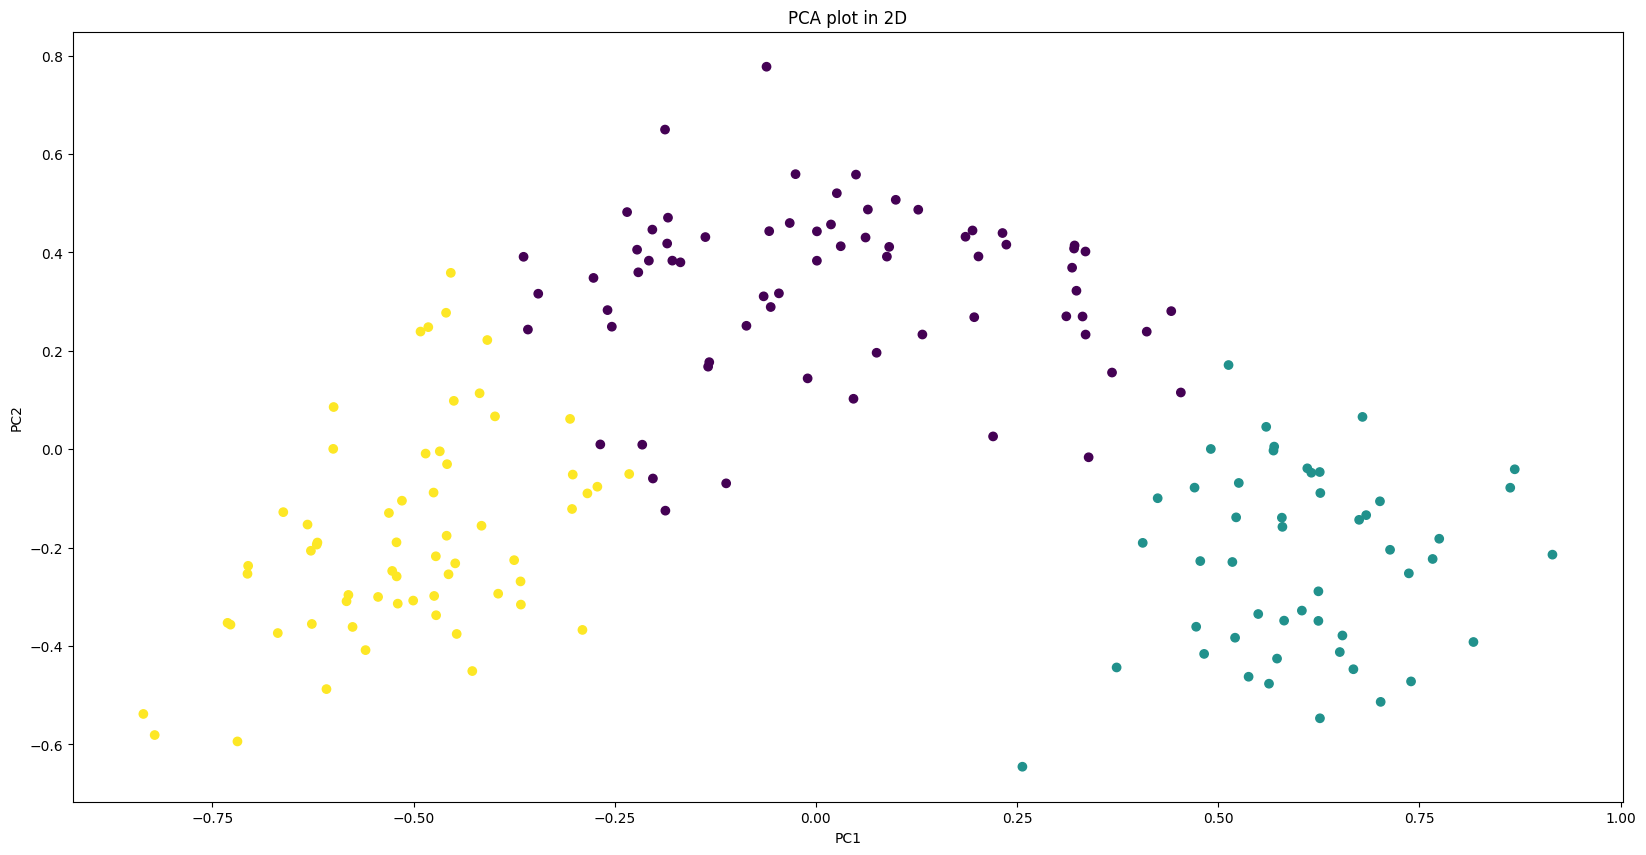

In [28]:
plt.figure(figsize=(20,10))
plt.scatter(df_norm_pca.iloc[:,0] , df_norm_pca.iloc[:,1], c=wine_og.ClusterId_hc_norm)

plt.title('PCA plot in 2D')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [29]:
#Elbow Method for Determining no of cluster
wcss = []

for i in range (2, 7):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(df_norm_pca)
    wcss.append(kmeans.inertia_)
    
wcss

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

[34.294639587969556,
 18.938260830466426,
 15.666001148083435,
 13.485591049749878,
 11.515332566227972]

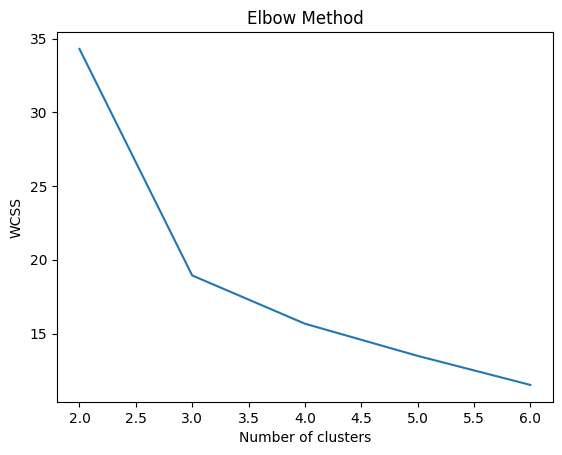

In [30]:
plt.plot(range(2, 7), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [31]:
clusters = KMeans(n_clusters=3, random_state= 1)
clusters.fit(df_norm_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=1)

In [32]:
clusters.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2,
       1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

In [33]:
wine_og['ClusterId_kmean_norm'] = clusters.labels_ 
wine_og[['Type' , 'ClusterId_kmean_norm']]

,Type,ClusterId_kmean_norm
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
173,3,0
174,3,0
175,3,0
176,3,0


In [34]:
wine_og.groupby('ClusterId_kmean_norm').agg(['mean'])

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,ClusterId_hc_norm
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
ClusterId_kmean_norm,,,,,,,,,,,,,,,
0,2.941176,13.134118,3.307255,2.417647,21.241176,98.666667,1.683922,0.818824,0.451961,1.145882,7.234706,0.691961,1.696667,619.058824,0.960784
1,1.092308,13.656923,1.946154,2.437692,17.441538,106.584615,2.864615,2.970000,0.284308,1.923846,5.361692,1.071385,3.148923,1080.107692,1.846154
2,2.000000,12.202742,1.946774,2.249839,20.211290,93.451613,2.200806,2.038710,0.369032,1.607903,2.949355,1.056387,2.801129,502.709677,0.032258


In [35]:
wine_og.groupby('Type').agg(['mean'])

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,ClusterId_hc_norm,ClusterId_kmean_norm
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Type,,,,,,,,,,,,,,,
1,13.744746,2.010678,2.455593,17.037288,106.338983,2.840169,2.982373,0.290000,1.899322,5.528305,1.062034,3.157797,1115.711864,1.830508,1.000000
2,12.278732,1.932676,2.244789,20.238028,94.549296,2.258873,2.080845,0.363662,1.630282,3.086620,1.056282,2.785352,519.507042,0.225352,1.830986
3,13.153750,3.333750,2.437083,21.416667,99.312500,1.678750,0.781458,0.447500,1.153542,7.396250,0.682708,1.683542,629.895833,0.979167,0.000000


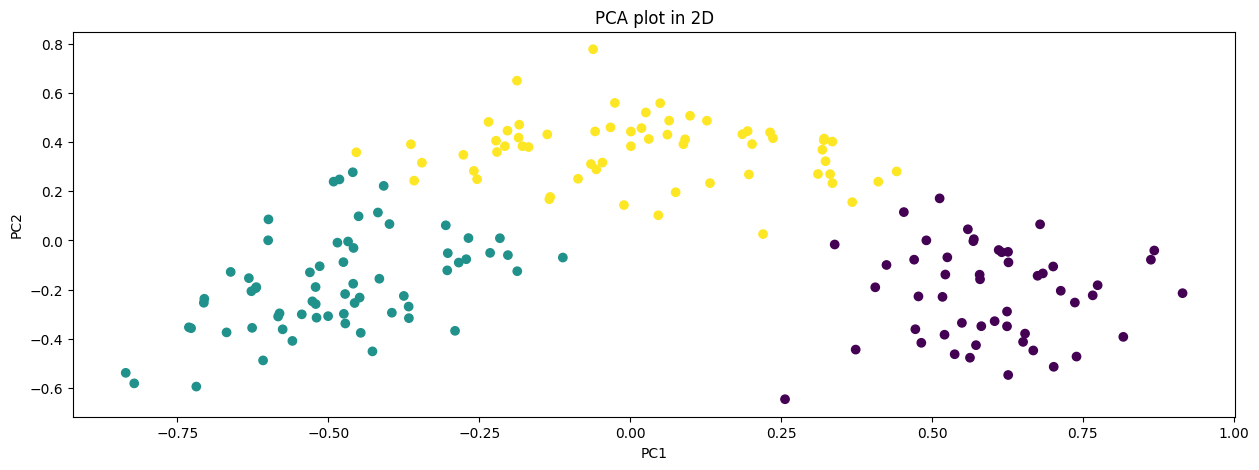

In [37]:
plt.figure(figsize=(15,5))
plt.scatter(df_norm_pca.iloc[:,0] ,df_norm_pca.iloc[:,1], c=wine_og.ClusterId_kmean_norm)

plt.title('PCA plot in 2D')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

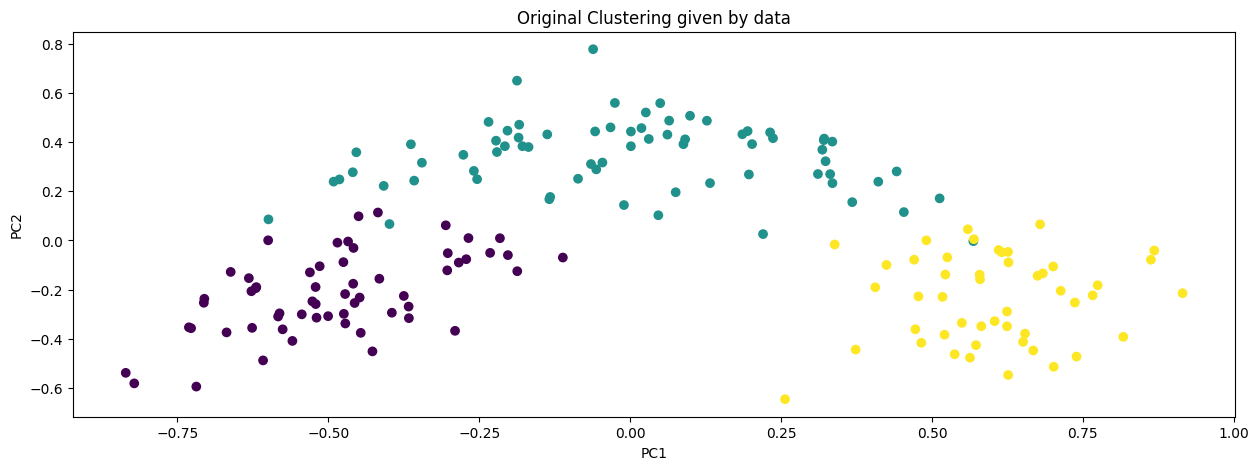

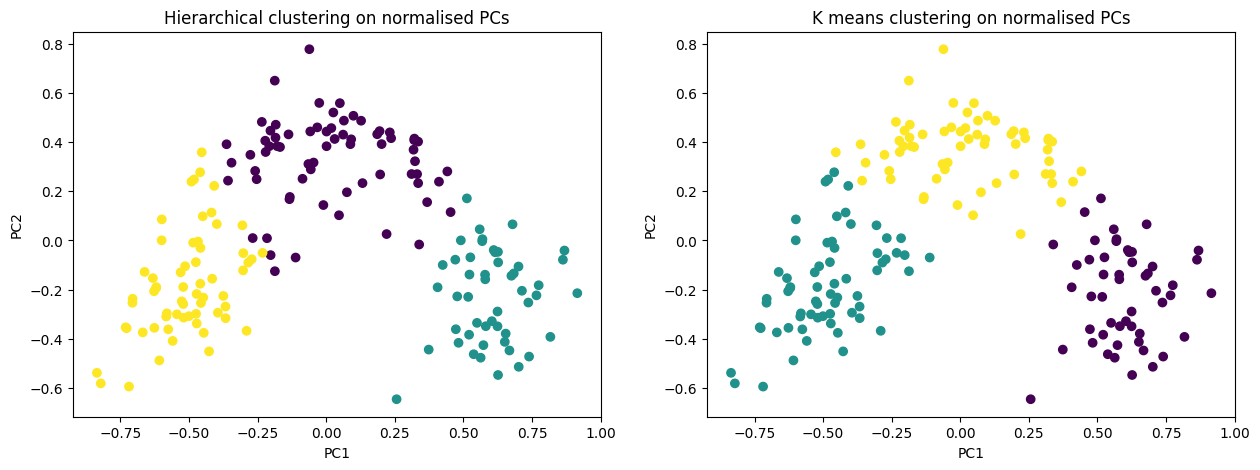

In [38]:
plt.figure(figsize=(15,5))
plt.scatter(df_norm_pca.iloc[:,0] , df_norm_pca.iloc[:,1], c=wine_og.Type)
plt.title('Original Clustering given by data')
plt.xlabel('PC1')
plt.ylabel('PC2')


plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.scatter(df_norm_pca.iloc[:,0] , df_norm_pca.iloc[:,1], c=wine_og.ClusterId_hc_norm)
plt.title('Hierarchical clustering on normalised PCs')
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.subplot(1,2,2)
plt.scatter(df_norm_pca.iloc[:,0] ,df_norm_pca.iloc[:,1], c=wine_og.ClusterId_kmean_norm)
plt.title('K means clustering on normalised PCs')
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.show